In [2]:
!pip3 install beautifulsoup4
!pip3 install requests

In [3]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
static_url ="https://en.wikipedia.org/wiki/List_of_Smallville_episodes#Season_1_(2001%E2%80%9302)"

In [5]:
data  = requests.get(static_url).text

In [6]:
soup = BeautifulSoup(data, "html5lib")

In [7]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>List of Smallville episodes - Wikipedia</title>


In [8]:
html_tables = soup.find_all("table")

In [9]:
first_season_table = html_tables[1]
print(first_season_table)

<table class="wikitable plainrowheaders wikiepisodetable" style="width:100%"><tbody><tr style="color:white;text-align:center"><th scope="col" style="background:#882D17;width:2%"><abbr title="Number">No.</abbr><br/>overall</th><th scope="col" style="background:#882D17;width:2%"><abbr title="Number">No.</abbr> in<br/>season</th><th scope="col" style="background:#882D17;width:17%">Title</th><th scope="col" style="background:#882D17;width:16%">Directed by</th><th scope="col" style="background:#882D17;width:21%">Written by</th><th scope="col" style="background:#882D17;width:15%">Original air date</th><th scope="col" style="background:#882D17;width:7%"><abbr title="Production">Prod.</abbr><br/>code</th><th scope="col" style="background:#882D17;width:9%">U.S. viewers<br/>(millions)</th></tr><tr class="vevent" style="text-align:center;background:inherit"><th id="ep1" rowspan="1" scope="row" style="text-align:center">1</th><td style="text-align:center">1</td><td class="summary" style="text-alig

In [10]:
season_1 =pd.read_html(str(first_season_table))
# convert list to dataframe
season_1=pd.DataFrame(season_1[0])
season_1

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,1,1,"""Pilot""",David Nutter,Alfred Gough & Miles Millar,"October 16, 2001",475165,8.35[2]
1,2,2,"""Metamorphosis""",Michael Watkins& Philip Sgriccia,Alfred Gough & Miles Millar,"October 23, 2001",227601,7.34[3]
2,3,3,"""Hothead""",Greg Beeman,Greg Walker,"October 30, 2001",227603,6.02[4]
3,4,4,"""X-Ray""",James Frawley,Mark Verheiden,"November 6, 2001",227604,6.63[5]
4,5,5,"""Cool""",James A. Contner,Michael Green,"November 13, 2001",227605,5.94[6]
5,6,6,"""Hourglass""",Chris Long,Doris Egan,"November 20, 2001",227606,6.36[7]
6,7,7,"""Craving""",Philip Sgriccia,Michael Green,"November 27, 2001",227607,7.39[8]
7,8,8,"""Jitters""",Michael Watkins,Cherie Bennett & Jeff Gottesfeld,"December 11, 2001",227602,5.80[9]
8,9,9,"""Rogue""",David Carson,Mark Verheiden,"January 15, 2002",227608,5.78[10]
9,10,10,"""Shimmer""",D. J. Caruso,Mark Verheiden & Michael Green,"January 29, 2002",227609,7.02[11]


In [18]:
season_1.tail()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
16,17,17,"""Reaper""",Terrence O'Hara,Cameron Litvack,"April 23, 2002",227616,5.48[18]
17,18,18,"""Drone""",Michael Katleman,Michael Green & Philip Levens,"April 30, 2002",227617,5.68[19]
18,19,19,"""Crush""",James Marshall,Philip Levens & Alfred Gough & Miles Millar,"May 7, 2002",227618,6.42[20]
19,20,20,"""Obscura""",Terrence O'Hara,Story by : : Greg WalkerTeleplay by : Mark Ver...,"May 14, 2002",227619,6.10[21]
20,21,21,"""Tempest""",Greg Beeman,Story by : Philip LevensTeleplay by : Alfred G...,"May 21, 2002",227620,5.96[22]


In [10]:
season_1.dtypes


No.overall                 int64
No. inseason               int64
Title                     object
Directed by               object
Written by                object
Original air date         object
Prod.code                  int64
U.S. viewers(millions)    object
dtype: object

In [163]:
season_1.dtypes

No.overall                 int64
No. inseason               int64
Title                     object
Directed by               object
Written by                object
Original air date         object
Prod.code                  int64
U.S. viewers(millions)    object
dtype: object

In [11]:
season_1['U.S. viewers(millions)'] = season_1['U.S. viewers(millions)'].str[:4]
season_1.head()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,1,1,"""Pilot""",David Nutter,Alfred Gough & Miles Millar,"October 16, 2001",475165,8.35
1,2,2,"""Metamorphosis""",Michael Watkins& Philip Sgriccia,Alfred Gough & Miles Millar,"October 23, 2001",227601,7.34
2,3,3,"""Hothead""",Greg Beeman,Greg Walker,"October 30, 2001",227603,6.02
3,4,4,"""X-Ray""",James Frawley,Mark Verheiden,"November 6, 2001",227604,6.63
4,5,5,"""Cool""",James A. Contner,Michael Green,"November 13, 2001",227605,5.94


In [44]:
season_1.dtypes

No.overall                 int64
No. inseason               int64
Title                     object
Directed by               object
Written by                object
Original air date         object
Prod.code                  int64
U.S. viewers(millions)    object
dtype: object

In [12]:
season_1 = season_1.astype({'U.S. viewers(millions)': 'float'})

In [51]:
season_1.dtypes

No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
Prod.code                   int64
U.S. viewers(millions)    float64
dtype: object

In [13]:
season_1['U.S. viewers(millions)'].mean()

6.4090476190476195

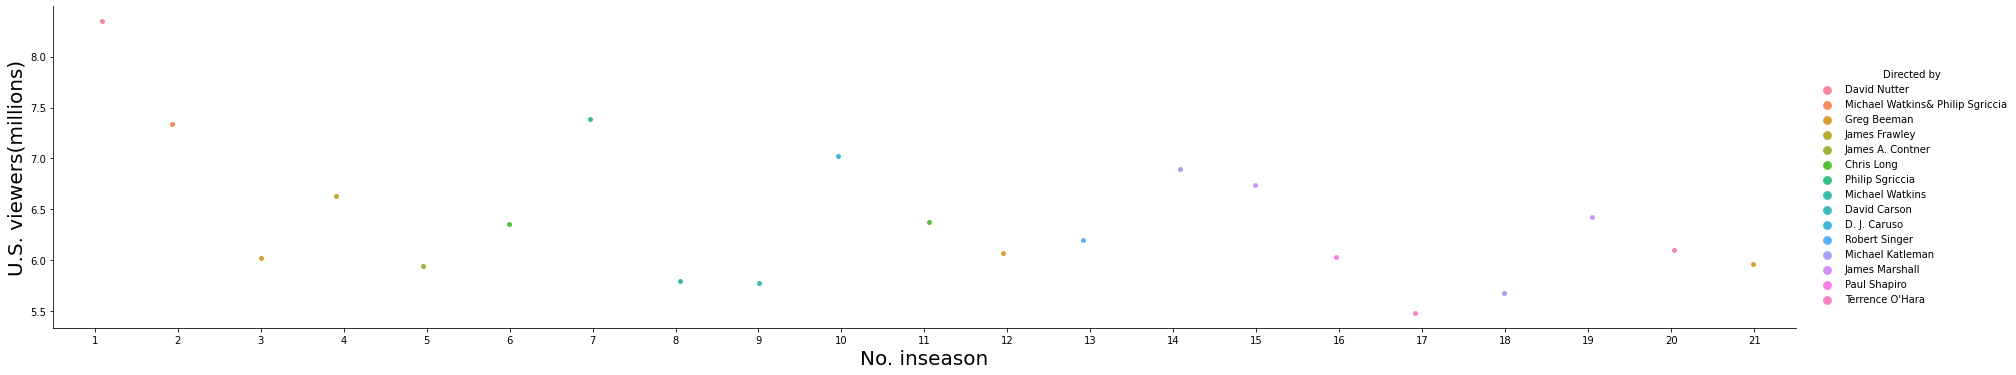

In [14]:
sns.catplot(y="U.S. viewers(millions)", x="No. inseason", hue="Directed by", data=season_1, aspect = 5)
plt.xlabel("No. inseason",fontsize=20)
plt.ylabel("U.S. viewers(millions)",fontsize=20)
plt.show()

In [15]:
season_1["Directed by"].value_counts()

Greg Beeman                         3
Chris Long                          2
James Marshall                      2
Terrence O'Hara                     2
Michael Katleman                    2
D. J. Caruso                        1
Robert Singer                       1
Philip Sgriccia                     1
David Carson                        1
James A. Contner                    1
David Nutter                        1
James Frawley                       1
Michael Watkins& Philip Sgriccia    1
Paul Shapiro                        1
Michael Watkins                     1
Name: Directed by, dtype: int64

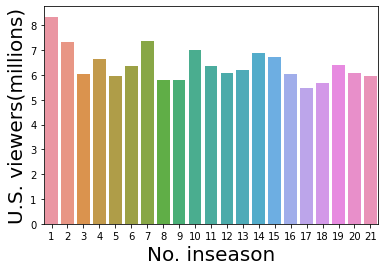

In [97]:
sns.barplot(y="U.S. viewers(millions)", x="No. inseason", data=season_1)

plt.xlabel("No. inseason",fontsize=20)
plt.ylabel("U.S. viewers(millions)",fontsize=20)
plt.show()

In [17]:
season_1 = season_1.drop(["Prod.code"], axis =1)
season_1.head()


,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,1,1,"""Pilot""",David Nutter,Alfred Gough & Miles Millar,"October 16, 2001",8.35
1,2,2,"""Metamorphosis""",Michael Watkins& Philip Sgriccia,Alfred Gough & Miles Millar,"October 23, 2001",7.34
2,3,3,"""Hothead""",Greg Beeman,Greg Walker,"October 30, 2001",6.02
3,4,4,"""X-Ray""",James Frawley,Mark Verheiden,"November 6, 2001",6.63
4,5,5,"""Cool""",James A. Contner,Michael Green,"November 13, 2001",5.94


In [18]:
second_season_table = html_tables[2]

In [19]:
season_2 =pd.read_html(str(second_season_table))
# convert list to dataframe
season_2=pd.DataFrame(season_2[0])
season_2

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,22,1,"""Vortex""",Greg Beeman,Story by : Alfred Gough & Miles MillarTeleplay...,"September 24, 2002",175051,8.66[23]
1,23,2,"""Heat""",James Marshall,Mark Verheiden,"October 1, 2002",175052,8.07[23]
2,24,3,"""Duplicity""",Steve Miner,Todd Slavkin & Darren Swimmer,"October 8, 2002",175053,8.82[23]
3,25,4,"""Red""",Jeff Woolnough,Jeph Loeb,"October 15, 2002",175054,8.89[23]
4,26,5,"""Nocturne""",Rick Wallace,Brian Peterson & Kelly Souders,"October 22, 2002",175055,8.3[23]
5,27,6,"""Redux""",Chris Long,Russel Friend & Garrett Lerner,"October 29, 2002",227621,8.22[23]
6,28,7,"""Lineage""",Greg Beeman,Story by : Alfred Gough & Miles MillarTeleplay...,"November 5, 2002",175056,9.38[23]
7,29,8,"""Ryan""",Terrence O'Hara,Philip Levens,"November 12, 2002",175057,7.35[23]
8,30,9,"""Dichotic""",Craig Zisk,Mark Verheiden,"November 19, 2002",175058,8.3[23]
9,31,10,"""Skinwalker""",Marita Grabiak,Story by : Mark WarshawTeleplay by : Brian Pet...,"November 26, 2002",175059,8.6[23]


In [20]:
season_2['U.S. viewers(millions)']= season_2['U.S. viewers(millions)'].str[:3]
season_2

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,22,1,"""Vortex""",Greg Beeman,Story by : Alfred Gough & Miles MillarTeleplay...,"September 24, 2002",175051,8.6
1,23,2,"""Heat""",James Marshall,Mark Verheiden,"October 1, 2002",175052,8.0
2,24,3,"""Duplicity""",Steve Miner,Todd Slavkin & Darren Swimmer,"October 8, 2002",175053,8.8
3,25,4,"""Red""",Jeff Woolnough,Jeph Loeb,"October 15, 2002",175054,8.8
4,26,5,"""Nocturne""",Rick Wallace,Brian Peterson & Kelly Souders,"October 22, 2002",175055,8.3
5,27,6,"""Redux""",Chris Long,Russel Friend & Garrett Lerner,"October 29, 2002",227621,8.2
6,28,7,"""Lineage""",Greg Beeman,Story by : Alfred Gough & Miles MillarTeleplay...,"November 5, 2002",175056,9.3
7,29,8,"""Ryan""",Terrence O'Hara,Philip Levens,"November 12, 2002",175057,7.3
8,30,9,"""Dichotic""",Craig Zisk,Mark Verheiden,"November 19, 2002",175058,8.3
9,31,10,"""Skinwalker""",Marita Grabiak,Story by : Mark WarshawTeleplay by : Brian Pet...,"November 26, 2002",175059,8.6


In [21]:
season_2 = season_2.drop(["Prod.code"], axis =1)

In [22]:
season_2 = season_2.astype({'U.S. viewers(millions)': 'float'})

In [23]:
season_2['U.S. viewers(millions)'].mean()

7.74782608695652

In [176]:
season_2.dtypes

No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [24]:
third_season_table = html_tables[3]

In [25]:
season_3 =pd.read_html(str(third_season_table))
# convert list to dataframe
season_3=pd.DataFrame(season_3[0])
season_3.head()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,45,1,"""Exile""",Greg Beeman,Alfred Gough & Miles Millar,"October 1, 2003",176201,6.82[24]
1,46,2,"""Phoenix""",James Marshall,Kelly Souders & Brian Peterson,"October 8, 2003",176202,6.74[24]
2,47,3,"""Extinction""",Michael Katleman,Todd Slavkin & Darren Swimmer,"October 15, 2003",176203,6.47[24]
3,48,4,"""Slumber""",Terrence O'Hara,Drew Z. Greenberg,"October 22, 2003",176204,6.92[24]
4,49,5,"""Perry""",Jeannot Szwarc,Mark Verheiden,"October 29, 2003",176205,6.70[24]


In [26]:
season_3 = season_3.drop(["Prod.code"], axis =1)

In [27]:
season_3['U.S. viewers(millions)']= season_3['U.S. viewers(millions)'].str[:4]
season_3

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,45,1,"""Exile""",Greg Beeman,Alfred Gough & Miles Millar,"October 1, 2003",6.82
1,46,2,"""Phoenix""",James Marshall,Kelly Souders & Brian Peterson,"October 8, 2003",6.74
2,47,3,"""Extinction""",Michael Katleman,Todd Slavkin & Darren Swimmer,"October 15, 2003",6.47
3,48,4,"""Slumber""",Terrence O'Hara,Drew Z. Greenberg,"October 22, 2003",6.92
4,49,5,"""Perry""",Jeannot Szwarc,Mark Verheiden,"October 29, 2003",6.70
5,50,6,"""Relic""",Marita Grabiak,Kelly Souders & Brian Peterson,"November 5, 2003",6.72
6,51,7,"""Magnetic""",David Jackson,Holly Harold,"November 12, 2003",6.87
7,52,8,"""Shattered""",Ken Biller,Ken Biller,"November 19, 2003",6.36
8,53,9,"""Asylum""",Greg Beeman,Todd Slavkin & Darren Swimmer,"January 14, 2004",5.61
9,54,10,"""Whisper""",Tom Wright,Ken Horton,"January 21, 2004",5.09


In [28]:
season_3 = season_3.astype({'U.S. viewers(millions)': 'float'})

In [29]:
season_3['U.S. viewers(millions)'].mean()

5.640454545454546

In [27]:
season_3.dtypes


No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [30]:
fourth_season_table = html_tables[4]

In [31]:
season_4 =pd.read_html(str(fourth_season_table))
# convert list to dataframe
season_4=pd.DataFrame(season_4[0])
season_4

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,67,1,"""Crusade""",Greg Beeman,Alfred Gough & Miles Millar,"September 22, 2004",2T5201,6.07[34]
1,68,2,"""Gone""",James Marshall,Kelly Souders & Brian Peterson,"September 29, 2004",2T5202,5.66[35]
2,69,3,"""Façade""",Pat Williams,Holly Harold,"October 6, 2004",2T5204,5.45[36]
3,70,4,"""Devoted""",David Carson,Luke Schelhaas,"October 13, 2004",2T5203,6.20[37]
4,71,5,"""Run""",David Barrett,Steven S. DeKnight,"October 20, 2004",2T5205,5.41[38]
5,72,6,"""Transference""",James Marshall,Todd Slavkin & Darren Swimmer,"October 27, 2004",2T5206,5.69[39]
6,73,7,"""Jinx""",Paul Shapiro,Mark Warshaw,"November 3, 2004",2T5207,5.02[40]
7,74,8,"""Spell""",Jeannot Szwarc,Steven S. DeKnight,"November 10, 2004",2T5208,5.51[41]
8,75,9,"""Bound""",Terrence O'Hara,Luke Schelhaas,"November 17, 2004",2T5209,5.06[42]
9,76,10,"""Scare""",David Carson,Kelly Souders & Brian Peterson,"December 1, 2004",2T5210,4.89[43]


In [32]:
season_4 = season_4.drop(["Prod.code"], axis =1)

In [33]:
season_4['U.S. viewers(millions)']= season_4['U.S. viewers(millions)'].str[:4]
season_4.tail()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
17,84,18,"""Spirit""",Whitney Ransick,Luke Schelhaas,"April 20, 2005",4.39
18,85,19,"""Blank""",Jeannot Szwarc,Kelly Souders & Brian Peterson,"April 27, 2005",4.59
19,86,20,"""Ageless""",Steven S. DeKnight,Steven S. DeKnight,"May 4, 2005",4.51
20,87,21,"""Forever""",James Marshall,Brian Peterson & Kelly Souders,"May 11, 2005",3.96
21,88,22,"""Commencement""",Greg Beeman,Todd Slavkin & Darren Swimmer,"May 18, 2005",5.47


In [34]:
season_4 = season_4.astype({'U.S. viewers(millions)': 'float'})

In [35]:
season_4['U.S. viewers(millions)'].mean()

5.021818181818182

In [34]:
season_4.dtypes

No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [36]:
fifth_season_table = html_tables[5]

In [37]:
season_5 =pd.read_html(str(fifth_season_table))
# convert list to dataframe
season_5=pd.DataFrame(season_5[0])
season_5

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,89,1,"""Arrival""",James Marshall,Todd Slavkin & Darren Swimmer,"September 29, 2005",2T6401,5.90[56]
1,90,2,"""Mortal""",Terrence O'Hara,Steven S. DeKnight,"October 6, 2005",2T6402,5.84[57]
2,91,3,"""Hidden""",Whitney Ransick,Kelly Souders & Brian Peterson,"October 13, 2005",2T6403,5.92[58]
3,92,4,""".mw-parser-output .vanchor>:target~.vanchor-t...",Bradford May,Todd Slavkin & Darren Swimmer,"October 20, 2005",2T6406,6.40[59]
4,93,5,"""Thirst""",Paul Shapiro,Steven S. DeKnight,"October 27, 2005",2T6404,5.78[60]
5,94,6,"""Exposed""",Jeannot Szwarc,Kelly Souders & Brian Peterson,"November 3, 2005",2T6405,5.41[61]
6,95,7,"""Splinter""",James Marshall,Steven S. DeKnight,"November 10, 2005",2T6408,5.51[62]
7,96,8,"""Solitude""",Paul Shapiro,Todd Slavkin & Darren Swimmer,"November 17, 2005",2T6407,5.97[63]
8,97,9,"""Lexmas""",Rick Rosenthal,Holly Harold,"December 8, 2005",2T6409,5.37[64]
9,98,10,"""Fanatic""",Michael Rohl,Wendy Mericle,"January 12, 2006",2T6410,5.45[65]


In [38]:
season_5 = season_5.drop(["Prod.code"], axis =1)

In [39]:
season_5['U.S. viewers(millions)']= season_5['U.S. viewers(millions)'].str[:4]
season_5.tail()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
17,106,18,"""Fragile""",Tom Welling,Todd Slavkin & Darren Swimmer,"April 13, 2006",3.94
18,107,19,"""Mercy""",James Marshall,Steven S. DeKnight,"April 20, 2006",4.41
19,108,20,"""Fade""",Terrence O'Hara,Turi Meyer & Al Septien,"April 27, 2006",4.34
20,109,21,"""Oracle""",Whitney Ransick,Story by : Neil Sadhu & Daniel SulzbergTelepla...,"May 4, 2006",4.81
21,110,22,"""Vessel""",James Marshall,Kelly Souders & Brian Peterson,"May 11, 2006",4.85


In [40]:
season_5 = season_5.astype({'U.S. viewers(millions)': 'float'})

In [41]:
season_5['U.S. viewers(millions)'].mean()

5.323636363636362

In [50]:
season_5.dtypes

No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [42]:
sixth_season_table = html_tables[6]

In [43]:
season_6 =pd.read_html(str(sixth_season_table))
# convert list to dataframe
season_6=pd.DataFrame(season_6[0])
season_6

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,111,1,"""Zod""",James Marshall,Steven S. DeKnight,"September 28, 2006",2T7701,4.96[78]
1,112,2,"""Sneeze""",Paul Shapiro,Todd Slavkin & Darren Swimmer,"October 5, 2006",2T7702,4.52[79]
2,113,3,"""Wither""",Whitney Ransick,Tracy Bellomo,"October 12, 2006",2T7703,4.88[80]
3,114,4,"""Arrow""",Michael Rohl,Brian Peterson & Kelly Souders,"October 19, 2006",2T7704,4.71[81]
4,115,5,"""Reunion""",Jeannot Szwarc,Steven S. DeKnight,"October 26, 2006",2T7705,4.79[82]
5,116,6,"""Fallout""",Glen Winter,Holly Harold,"November 2, 2006",2T7706,5.01[83]
6,117,7,"""Rage""",Whitney Ransick,Todd Slavkin & Darren Swimmer,"November 9, 2006",2T7707,4.46[84]
7,118,8,"""Static""",James Conway,Shintaro Shimosawa & James Morris,"November 16, 2006",2T7708,4.70[85]
8,119,9,"""Subterranean""",Rick Rosenthal,Caroline Dries,"December 7, 2006",2T7709,4.31[86]
9,120,10,"""Hydro""",Tom Welling,Brian Peterson & Kelly Souders,"January 11, 2007",2T7710,4.68[87]


In [44]:
season_6 = season_6.drop(["Prod.code"], axis =1)

In [45]:
season_6['U.S. viewers(millions)']= season_6['U.S. viewers(millions)'].str[:4]
season_6.tail()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
17,128,18,"""Progeny""",Terrence O'Hara,Genevieve Sparling,"April 19, 2007",3.98
18,129,19,"""Nemesis""",Mairzee Almas,Caroline Dries,"April 26, 2007",3.88
19,130,20,"""Noir""",Jeannot Szwarc,Brian Peterson & Kelly Souders,"May 3, 2007",3.59
20,131,21,"""Prototype""",Mat Beck,Steven S. DeKnight,"May 10, 2007",3.43
21,132,22,"""Phantom""",James Marshall,Todd Slavkin & Darren Swimmer,"May 17, 2007",4.14


In [46]:
season_6 = season_6.astype({'U.S. viewers(millions)': 'float'})

In [47]:
season_6['U.S. viewers(millions)'].mean()

4.5213636363636365

In [58]:
season_6.dtypes

No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [48]:
seventh_season_table = html_tables[7]

In [49]:
season_7 =pd.read_html(str(seventh_season_table))
# convert list to dataframe
season_7=pd.DataFrame(season_7[0])
season_7

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,133,1,"""Bizarro""",Michael Rohl,Brian Peterson & Kelly Souders,"September 27, 2007",3T6301,5.18[100]
1,134,2,"""Kara""",James Conway,Todd Slavkin & Darren Swimmer,"October 4, 2007",3T6302,4.59[101]
2,135,3,"""Fierce""",Whitney Ransick,Holly Harold,"October 11, 2007",3T6303,4.82[102]
3,136,4,"""Cure""",Rick Rosenthal,Al Septien & Turi Meyer,"October 18, 2007",3T6304,5.18[103]
4,137,5,"""Action""",Mairzee Almas,Caroline Dries,"October 25, 2007",3T6306,4.65[104]
5,138,6,"""Lara""",James Conway,Don Whitehead & Holly Henderson,"November 1, 2007",3T6305,4.31[105]
6,139,7,"""Wrath""",Charles Beeson,Kelly Souders & Brian Peterson,"November 8, 2007",3T6307,4.64[106]
7,140,8,"""Blue""",Glen Winter,Todd Slavkin & Darren Swimmer,"November 15, 2007",3T6308,4.51[107]
8,141,9,"""Gemini""",Whitney Ransick,Caroline Dries,"December 13, 2007",3T6309,3.71[108]
9,142,10,"""Persona""",Todd Slavkin,Don Whitehead & Holly Henderson,"January 31, 2008",3T6310,3.81[109]


In [50]:
season_7 = season_7.drop(["Prod.code"], axis =1)

In [51]:
season_7['U.S. viewers(millions)']= season_7['U.S. viewers(millions)'].str[:4]
season_7.tail()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
15,148,16,"""Descent""",Ken Horton,Don Whitehead & Holly Henderson,"April 17, 2008",3.61
16,149,17,"""Sleeper""",Whitney Ransick,Caroline Dries,"April 24, 2008",3.62
17,150,18,"""Apocalypse""",Tom Welling,Al Septien & Turi Meyer,"May 1, 2008",3.81
18,151,19,"""Quest""",Kenneth Biller,Holly Harold,"May 8, 2008",3.99
19,152,20,"""Arctic""",Todd Slavkin,Don Whitehead & Holly Henderson,"May 15, 2008",3.85


In [52]:
season_7 = season_7.astype({'U.S. viewers(millions)': 'float'})

In [53]:
season_7['U.S. viewers(millions)'].mean()

4.153

In [65]:
season_7.dtypes

No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [54]:
eighth_season_table = html_tables[8]

In [55]:
season_8 =pd.read_html(str(eighth_season_table))
# convert list to dataframe
season_8=pd.DataFrame(season_8[0])
season_8

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,153,1,"""Odyssey""",Kevin G. Fair,Story by : Brian Peterson & Kelly SoudersTelep...,"September 18, 2008",3T7451,4.34[120]
1,154,2,"""Plastique""",Rick Rosenthal,Don Whitehead & Holly Henderson,"September 25, 2008",3T7452,4.18[121]
2,155,3,"""Toxic""",Mairzee Almas,Caroline Dries,"October 2, 2008",3T7453,4.11[122]
3,156,4,"""Instinct""",James Conway,Al Septien & Turi Meyer,"October 9, 2008",3T7454,4.05[123]
4,157,5,"""Committed""",Glen Winter,Bryan Q. Miller,"October 16, 2008",3T7455,4.18[124]
5,158,6,"""Prey""",Michael Rohl,Kelly Souders & Brian Peterson,"October 23, 2008",377456,4.15[125]
6,159,7,"""Identity""",Mairzee Almas,Todd Slavkin & Darren Swimmer,"October 30, 2008",3T7457,4.32[126]
7,160,8,"""Bloodline""",Michael Rohl,Caroline Dries,"November 6, 2008",3T7459,4.45[127]
8,161,9,"""Abyss""",Kevin G. Fair,Don Whitehead & Holly Henderson,"November 13, 2008",3T7458,3.55[128]
9,162,10,"""Bride""",Jeannot Szwarc,Al Septien & Turi Meyer,"November 20, 2008",3T7460,4.18[129]


In [56]:
season_8 = season_8.drop(["Prod.code"], axis =1)

In [57]:
season_8['U.S. viewers(millions)']= season_8['U.S. viewers(millions)'].str[:4]
season_8.tail()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
17,170,18,"""Eternal""",James Marshall,Brian Peterson & Kelly Souders,"April 2, 2009",3.84
18,171,19,"""Stiletto""",Kevin G. Fair,Caroline Dries,"April 23, 2009",3.10
19,172,20,"""Beast""",Michael Rohl,Genevieve Sparling,"April 30, 2009",3.23
20,173,21,"""Injustice""",Tom Welling,Al Septien & Turi Meyer,"May 7, 2009",3.39
21,174,22,"""Doomsday""",James Marshall,Brian Peterson & Kelly Souders,"May 14, 2009",3.13


In [58]:
season_8 = season_8.astype({'U.S. viewers(millions)': 'float'})

In [59]:
season_8['U.S. viewers(millions)'].mean()

3.8781818181818184

In [213]:
season_8.dtypes

No.overall                  int64
No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [60]:
ninth_season_table = html_tables[9]

In [61]:
season_9 =pd.read_html(str(ninth_season_table))
# convert list to dataframe
season_9=pd.DataFrame(season_9[0])
season_9

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,175,1,"""Savior""",Kevin G. Fair,Kelly Souders & Brian Peterson,"September 25, 2009",3X5251,2.58[142]
1,176,2,"""Metallo""",Mairzee Almas,Don Whitehead & Holly Henderson,"October 2, 2009",3X5252,2.24[143]
2,177,3,"""Rabid""",Michael Rohl,Jordan Hawley,"October 9, 2009",3X5253,2.30[144]
3,178,4,"""Echo""",Wayne Rose,Bryan Miller,"October 16, 2009",3X5254,2.61[145]
4,179,5,"""Roulette""",Kevin G. Fair,Genevieve Sparling,"October 23, 2009",3X5256,2.52[146]
5,180,6,"""Crossfire""",Michael Rohl,Don Whitehead & Holly Henderson,"October 30, 2009",3X5257,2.57[147]
6,181,7,"""Kandor""",Jeannot Szwarc,Al Septien & Turi Meyer,"November 6, 2009",3X5258,2.63[148]
7,182,8,"""Idol""",Glen Winter,Anne Cofell Saunders,"November 13, 2009",3X5255,2.68[149]
8,183,9,"""Pandora""",Morgan Beggs,Drew Landis & Julia Swift,"November 20, 2009",3X5259,2.45[150]
9,184,10,"""Disciple""",Mairzee Almas,Jordan Hawley,"January 29, 2010",3X5260,2.52[151]


In [62]:
season_9 = season_9.drop(["Prod.code"], axis =1)

In [63]:
season_9['U.S. viewers(millions)']= season_9['U.S. viewers(millions)'].str[:4]
season_9.tail()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
16,191,17,"""Upgrade""",Michael Rohl,Drew Landis & Julia Swift,"April 16, 2010",1.84
17,192,18,"""Charade""",Brian Peterson,Don Whitehead & Holly Henderson,"April 23, 2010",2.23
18,193,19,"""Sacrifice""",Kevin G. Fair,Story by : Justin Hartley & Walter WongTelepla...,"April 30, 2010",1.89
19,194,20,"""Hostage""",Glen Winter,Jordan Hawley & Anne Cofell Saunders,"May 7, 2010",1.92
20,195,21,"""Salvation""",Greg Beeman,Al Septien & Turi Meyer,"May 14, 2010",2.45


In [64]:
season_9 = season_9.astype({'U.S. viewers(millions)': 'float'})

In [65]:
season_9['U.S. viewers(millions)'].mean()

2.375714285714286

In [66]:
season_9['No. inseason']= season_9['No. inseason'].str[:2]
season_9

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,175,1,"""Savior""",Kevin G. Fair,Kelly Souders & Brian Peterson,"September 25, 2009",2.58
1,176,2,"""Metallo""",Mairzee Almas,Don Whitehead & Holly Henderson,"October 2, 2009",2.24
2,177,3,"""Rabid""",Michael Rohl,Jordan Hawley,"October 9, 2009",2.30
3,178,4,"""Echo""",Wayne Rose,Bryan Miller,"October 16, 2009",2.61
4,179,5,"""Roulette""",Kevin G. Fair,Genevieve Sparling,"October 23, 2009",2.52
5,180,6,"""Crossfire""",Michael Rohl,Don Whitehead & Holly Henderson,"October 30, 2009",2.57
6,181,7,"""Kandor""",Jeannot Szwarc,Al Septien & Turi Meyer,"November 6, 2009",2.63
7,182,8,"""Idol""",Glen Winter,Anne Cofell Saunders,"November 13, 2009",2.68
8,183,9,"""Pandora""",Morgan Beggs,Drew Landis & Julia Swift,"November 20, 2009",2.45
9,184,10,"""Disciple""",Mairzee Almas,Jordan Hawley,"January 29, 2010",2.52


In [67]:
season_9 = season_9.astype({'No. inseason': 'int'})

In [320]:
season_9.dtypes

No.overall                  int64
No. inseason                int32
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [68]:
tenth_season_table = html_tables[10]

In [69]:
season_10 =pd.read_html(str(tenth_season_table))
# convert list to dataframe
season_10=pd.DataFrame(season_10[0])
season_10

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,196,1,"""Lazarus""",Kevin G. Fair,Don Whitehead & Holly Henderson,"September 24, 2010",3X6001,2.98[165]
1,197,2,"""Shield""",Glen Winter,Jordan Hawley,"October 1, 2010",3X6002,2.38[166]
2,198,3,"""Supergirl""",Mairzee Almas,Anne Cofell Saunders,"October 8, 2010",3X6003,2.30[167]
3,199,4[N 2],"""Homecoming""",Jeannot Szwarc,Brian Peterson & Kelly Souders,"October 15, 2010",3X6004,3.19[170]
4,200,5,"""Isis""",James Marshall,Genevieve Sparling,"October 22, 2010",3X6005,2.60[171]
5,201,6,"""Harvest""",Turi Meyer,Al Septien & Turi Meyer,"October 29, 2010",3X6007,2.96[172]
6,202,7,"""Ambush""",Christopher Petry,Don Whitehead & Holly Henderson,"November 5, 2010",3X6006,2.63[173]
7,203,8,"""Abandoned""",Kevin G. Fair,Drew Landis & Julia Swift,"November 12, 2010",3X6008,2.90[174]
8,204,9,"""Patriot""",Tom Welling,John Chisholm,"November 19, 2010",3X6009,2.60[175]
9,205,10,"""Luthor""",Kelly Souders,Bryan Q. Miller,"December 3, 2010",3X6010,2.76[176]


In [70]:
season_10 = season_10.drop(["Prod.code"], axis =1)

In [71]:
season_10 =season_10.replace('4[N 2]', '4')

In [72]:
season_10 =season_10.drop(22)

In [73]:
season_10.at[21,'No. inseason']='22'
season_10.at[20,'No. inseason']='21'
season_10.at[21,'No.overall']='217'
season_10.at[20,'No.overall']='216'
season_10

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,196,1,"""Lazarus""",Kevin G. Fair,Don Whitehead & Holly Henderson,"September 24, 2010",2.98[165]
1,197,2,"""Shield""",Glen Winter,Jordan Hawley,"October 1, 2010",2.38[166]
2,198,3,"""Supergirl""",Mairzee Almas,Anne Cofell Saunders,"October 8, 2010",2.30[167]
3,199,4,"""Homecoming""",Jeannot Szwarc,Brian Peterson & Kelly Souders,"October 15, 2010",3.19[170]
4,200,5,"""Isis""",James Marshall,Genevieve Sparling,"October 22, 2010",2.60[171]
5,201,6,"""Harvest""",Turi Meyer,Al Septien & Turi Meyer,"October 29, 2010",2.96[172]
6,202,7,"""Ambush""",Christopher Petry,Don Whitehead & Holly Henderson,"November 5, 2010",2.63[173]
7,203,8,"""Abandoned""",Kevin G. Fair,Drew Landis & Julia Swift,"November 12, 2010",2.90[174]
8,204,9,"""Patriot""",Tom Welling,John Chisholm,"November 19, 2010",2.60[175]
9,205,10,"""Luthor""",Kelly Souders,Bryan Q. Miller,"December 3, 2010",2.76[176]


In [74]:
season_10['U.S. viewers(millions)']= season_10['U.S. viewers(millions)'].str[:4]
season_10

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,196,1,"""Lazarus""",Kevin G. Fair,Don Whitehead & Holly Henderson,"September 24, 2010",2.98
1,197,2,"""Shield""",Glen Winter,Jordan Hawley,"October 1, 2010",2.38
2,198,3,"""Supergirl""",Mairzee Almas,Anne Cofell Saunders,"October 8, 2010",2.30
3,199,4,"""Homecoming""",Jeannot Szwarc,Brian Peterson & Kelly Souders,"October 15, 2010",3.19
4,200,5,"""Isis""",James Marshall,Genevieve Sparling,"October 22, 2010",2.60
5,201,6,"""Harvest""",Turi Meyer,Al Septien & Turi Meyer,"October 29, 2010",2.96
6,202,7,"""Ambush""",Christopher Petry,Don Whitehead & Holly Henderson,"November 5, 2010",2.63
7,203,8,"""Abandoned""",Kevin G. Fair,Drew Landis & Julia Swift,"November 12, 2010",2.90
8,204,9,"""Patriot""",Tom Welling,John Chisholm,"November 19, 2010",2.60
9,205,10,"""Luthor""",Kelly Souders,Bryan Q. Miller,"December 3, 2010",2.76


In [75]:
season_10 = season_10.astype({'U.S. viewers(millions)': 'float'})

In [76]:
season_10['U.S. viewers(millions)'].mean()

2.5600000000000005

In [77]:
season_10 = season_10.astype({'No. inseason': 'int'})

In [144]:
season_10.dtypes

No.overall                 object
No. inseason                int32
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

In [85]:
seasons = [season_1, season_2, season_3, season_4, season_5, season_6, season_7, season_8, season_9, season_10]
smallville = pd.concat(seasons)
smallville

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,1,1,"""Pilot""",David Nutter,Alfred Gough & Miles Millar,"October 16, 2001",8.35
1,2,2,"""Metamorphosis""",Michael Watkins& Philip Sgriccia,Alfred Gough & Miles Millar,"October 23, 2001",7.34
2,3,3,"""Hothead""",Greg Beeman,Greg Walker,"October 30, 2001",6.02
3,4,4,"""X-Ray""",James Frawley,Mark Verheiden,"November 6, 2001",6.63
4,5,5,"""Cool""",James A. Contner,Michael Green,"November 13, 2001",5.94
...,...,...,...,...,...,...,...
17,213,18,"""Booster""",Tom Welling,Geoff Johns,"April 22, 2011",2.35
18,214,19,"""Dominion""",Justin Hartley,John Chisholm,"April 29, 2011",1.99
19,215,20,"""Prophecy""",Mike Rohl,Bryan Q. Miller & Anne Cofell Saunders,"May 6, 2011",2.07
20,216,21,"""Finale""",Kevin G. Fair,Al Septien & Turi Meyer,"May 13, 2011",3.02


In [86]:
smallville = smallville.astype({'No.overall': 'float'})

In [87]:
smallville["No. inseason"].value_counts()

12    10
11    10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
1     10
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10
21     9
22     7
23     1
Name: No. inseason, dtype: int64

In [83]:
smallville.dtypes

No. inseason                int64
Title                      object
Directed by                object
Written by                 object
Original air date          object
U.S. viewers(millions)    float64
dtype: object

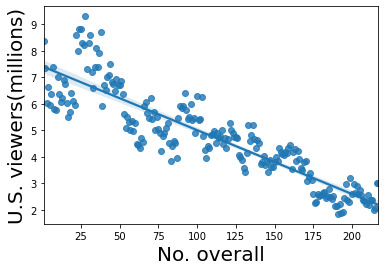

In [88]:
sns.regplot(data=smallville, x="No.overall", y="U.S. viewers(millions)")
plt.xlabel("No. overall",fontsize=20)
plt.ylabel("U.S. viewers(millions)",fontsize=20)
plt.show()

In [89]:
smallville.describe()

,No.overall,No. inseason,U.S. viewers(millions)
count,217.000000,217.000000,217.000000
mean,109.000000,11.364055,4.785899
std,62.786676,6.296030,1.694812
min,1.000000,1.000000,1.840000
25%,55.000000,6.000000,3.620000
50%,109.000000,11.000000,4.700000
75%,163.000000,17.000000,5.920000
max,217.000000,23.000000,9.300000


In [90]:
X = smallville.iloc[:, :1].values
y = smallville.iloc[:, -1].values


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state = 0)

In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = regressor.predict(X_test)

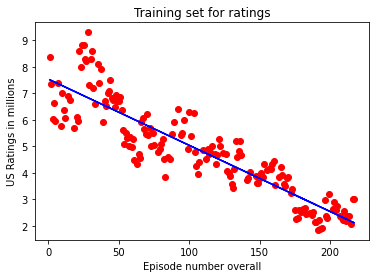

In [94]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Training set for ratings")
plt.xlabel('Episode number overall')
plt.ylabel("US Ratings in millions")
plt.show()

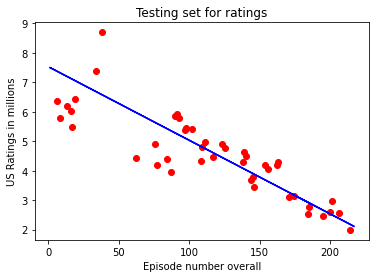

In [95]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Testing set for ratings")
plt.xlabel('Episode number overall')
plt.ylabel("US Ratings in millions")
plt.show()

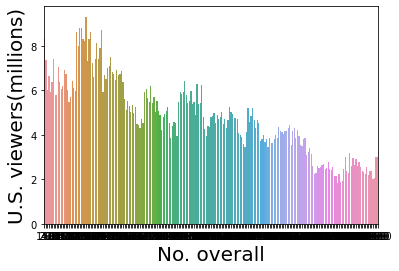

In [100]:
sns.barplot(y="U.S. viewers(millions)", x="No.overall", data=smallville)

plt.xlabel("No. overall",fontsize=20)
plt.ylabel("U.S. viewers(millions)",fontsize=20)
plt.show()